In [26]:
import tensorflow as tf
import numpy as np


In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [14]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [15]:
#summary of the data
print("train_images.shape: ", train_images.shape)
print("train_labels.shape: ", train_labels.shape)

train_images.shape:  (60000, 28, 28)
train_labels.shape:  (60000,)


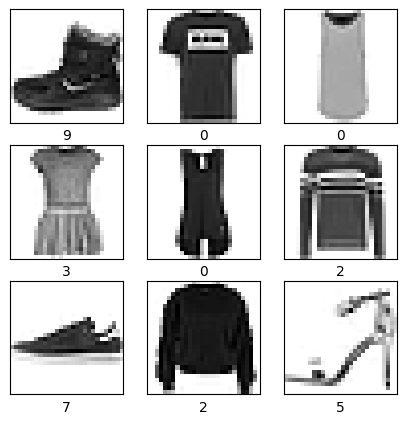

In [16]:
#plot first few images
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(330+1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])



In [17]:
x_train=x_train/255.0
x_test=x_test/255.0


In [23]:
model=tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
      ])

In [24]:
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

#evaluate the model
test_loss, test_acc=model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7844 - loss: 0.6268
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8655 - loss: 0.3781
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8767 - loss: 0.3380
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8857 - loss: 0.3128
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8936 - loss: 0.2919
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8699 - loss: 0.3605
Test accuracy: 0.8707000017166138


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[1.0306138e-06 2.5532847e-07 1.3756878e-08 1.6259192e-09 2.5244597e-07
 4.3597673e-03 1.5754850e-07 1.4366901e-02 5.5360655e-08 9.8127156e-01]
predicted class:  9
actual class:  9


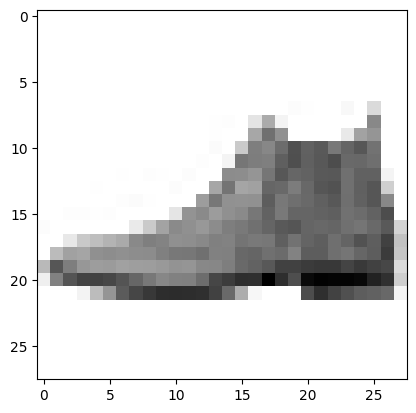

In [27]:
predictions=model.predict(x_test)
print(predictions[0])
print("predicted class: ", np.argmax(predictions[0]))
print("actual class: ", y_test[0])
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
